In [1]:
import PIL

import matplotlib.pyplot as plt
import numpy as np
import torch

import genime

ModuleNotFoundError: No module named 'genime'

In [4]:
ckpt = torch.load('../checkpoints/epoch=0_v0.ckpt')

ckpt.keys()

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'checkpoint_callback_best_model_score', 'checkpoint_callback_best_model_path', 'optimizer_states', 'lr_schedulers', 'state_dict'])

In [5]:
from genime.models import UNetModel

model = UNetModel(
    lr=0.003,
    n_channels=3,
    n_classes=3,
)

model.load_state_dict(ckpt['state_dict'])

<All keys matched successfully>

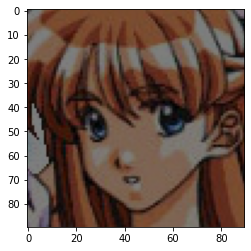

In [6]:
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage

img_0 = Image.open('../data/images/5_2000.jpg')
img_1 = torch.unsqueeze(ToTensor()(img_0) * 0.5, 0)
img_2 = ToPILImage()(torch.squeeze(img_1, 0)).convert('RGB')
plt.imshow(img_2)

In [7]:
out_0 = model(img_1)
out_1 = ToPILImage()(torch.squeeze(out_0, 0)).convert('RGB')
plt.imshow(out_1)

RuntimeError: Sizes of tensors must match except in dimension 1. Got 45 and 44 in dimension 2 (The offending index is 1)

In [8]:
img_1.shape

torch.Size([3, 90, 90])